In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

In [ ]:
# Read the CSV file
df = pd.read_csv('wine.data', sep=',')

In [18]:
# Define the column names
column_names = ['Type', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

# Set the column names of the DataFrame
df.columns = column_names

In [20]:
df

,Type,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
173,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
174,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
175,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [26]:
# Define the input features (X) and target variable (Y)
X = np.array(df.drop('Type', axis=1))
Y = np.array(df['Type'])

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Create a logistic regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, Y_train)

# Make predictions on the test data
Y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(Y_test, Y_pred)

# Print the accuracy of the model
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.94


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

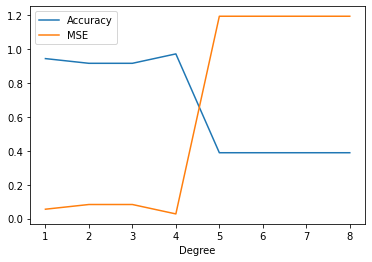

In [32]:
degrees = range(1, 9)
accuracy_list = []
mse_list = []

for degree in degrees:
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    # Split the data into training and test sets
    X_train, X_test, Y_train, Y_test = train_test_split(X_poly, Y, test_size=0.2, random_state=0)

    # Create a logistic regression model
    model = LogisticRegression()

    # Train the model on the training data
    model.fit(X_train, Y_train)

    # Make predictions on the test data
    Y_pred = model.predict(X_test)

    # Calculate the accuracy of the model
    accuracy = accuracy_score(Y_test, Y_pred)
    accuracy_list.append(accuracy)

    # Calculate the mean squared error of the model
    mse = mean_squared_error(Y_test, Y_pred)
    mse_list.append(mse)

# Plot the accuracy and mean squared error for each degree
plt.plot(degrees, accuracy_list, label='Accuracy')
plt.plot(degrees, mse_list, label='MSE')
plt.xlabel('Degree')
plt.legend()
plt.show()

In [41]:
# Define the input features (X) and target variable (Y)
X = np.array(df.drop('Type', axis=1))
Y = np.array(df['Type'])

# Shift the classes in Y from [1, 2, 3] to [0, 1, 2]
Y = Y - 1


# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Create the models
models = {
    'Support Vector Classification': SVC(),
    'Random Forest Classification': RandomForestClassifier(),
    'Neural Network Classification': MLPClassifier(),
    'XGBoost Classification': XGBClassifier(),
    'Logistic Regression': LogisticRegression()
}

# Train the models and check their accuracy
for name, model in models.items():
    # Train the model on the training data
    model.fit(X_train, Y_train)

    # Make predictions on the test data
    Y_pred = model.predict(X_test)

    # Calculate the accuracy of the model
    accuracy = accuracy_score(Y_test, Y_pred)

    # Print the accuracy of the model
    print(f'{name} Accuracy: {accuracy:.2f}')


Support Vector Classification Accuracy: 0.86
Random Forest Classification Accuracy: 0.97
Neural Network Classification Accuracy: 0.92
XGBoost Classification Accuracy: 0.94
Logistic Regression Accuracy: 0.94


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [51]:
# Define the input features (X) and target variable (Y)
X = np.array(df.drop('Type', axis=1))
Y = np.array(df['Type'])

# Shift the classes in Y from [1, 2, 3] to [0, 1, 2]
Y = Y - 1


# # Split the data into training and test sets
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X_poly, Y, test_size=0.2, random_state=0)

# Create a logistic regression model
model = LogisticRegression()

# Create the models
models = {
    'Support Vector Classification': SVC(),
    'Random Forest Classification': RandomForestClassifier(),
    'Neural Network Classification': MLPClassifier(),
    'XGBoost Classification': XGBClassifier(),
    'Logistic Regression': LogisticRegression()
}

# Train the models and check their accuracy
for name, model in models.items():
    # Train the model on the training data
    model.fit(X_train, Y_train)

    # Make predictions on the test data
    Y_pred = model.predict(X_test)

    # Calculate the accuracy of the model
    accuracy = accuracy_score(Y_test, Y_pred)

    # Print the accuracy of the model
    print(f'{name} Accuracy: {accuracy:.2f}')
    
    


Support Vector Classification Accuracy: 0.78
Random Forest Classification Accuracy: 0.97
Neural Network Classification Accuracy: 0.42
XGBoost Classification Accuracy: 0.94
Logistic Regression Accuracy: 0.92


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
